#ロジスティック回帰による分類

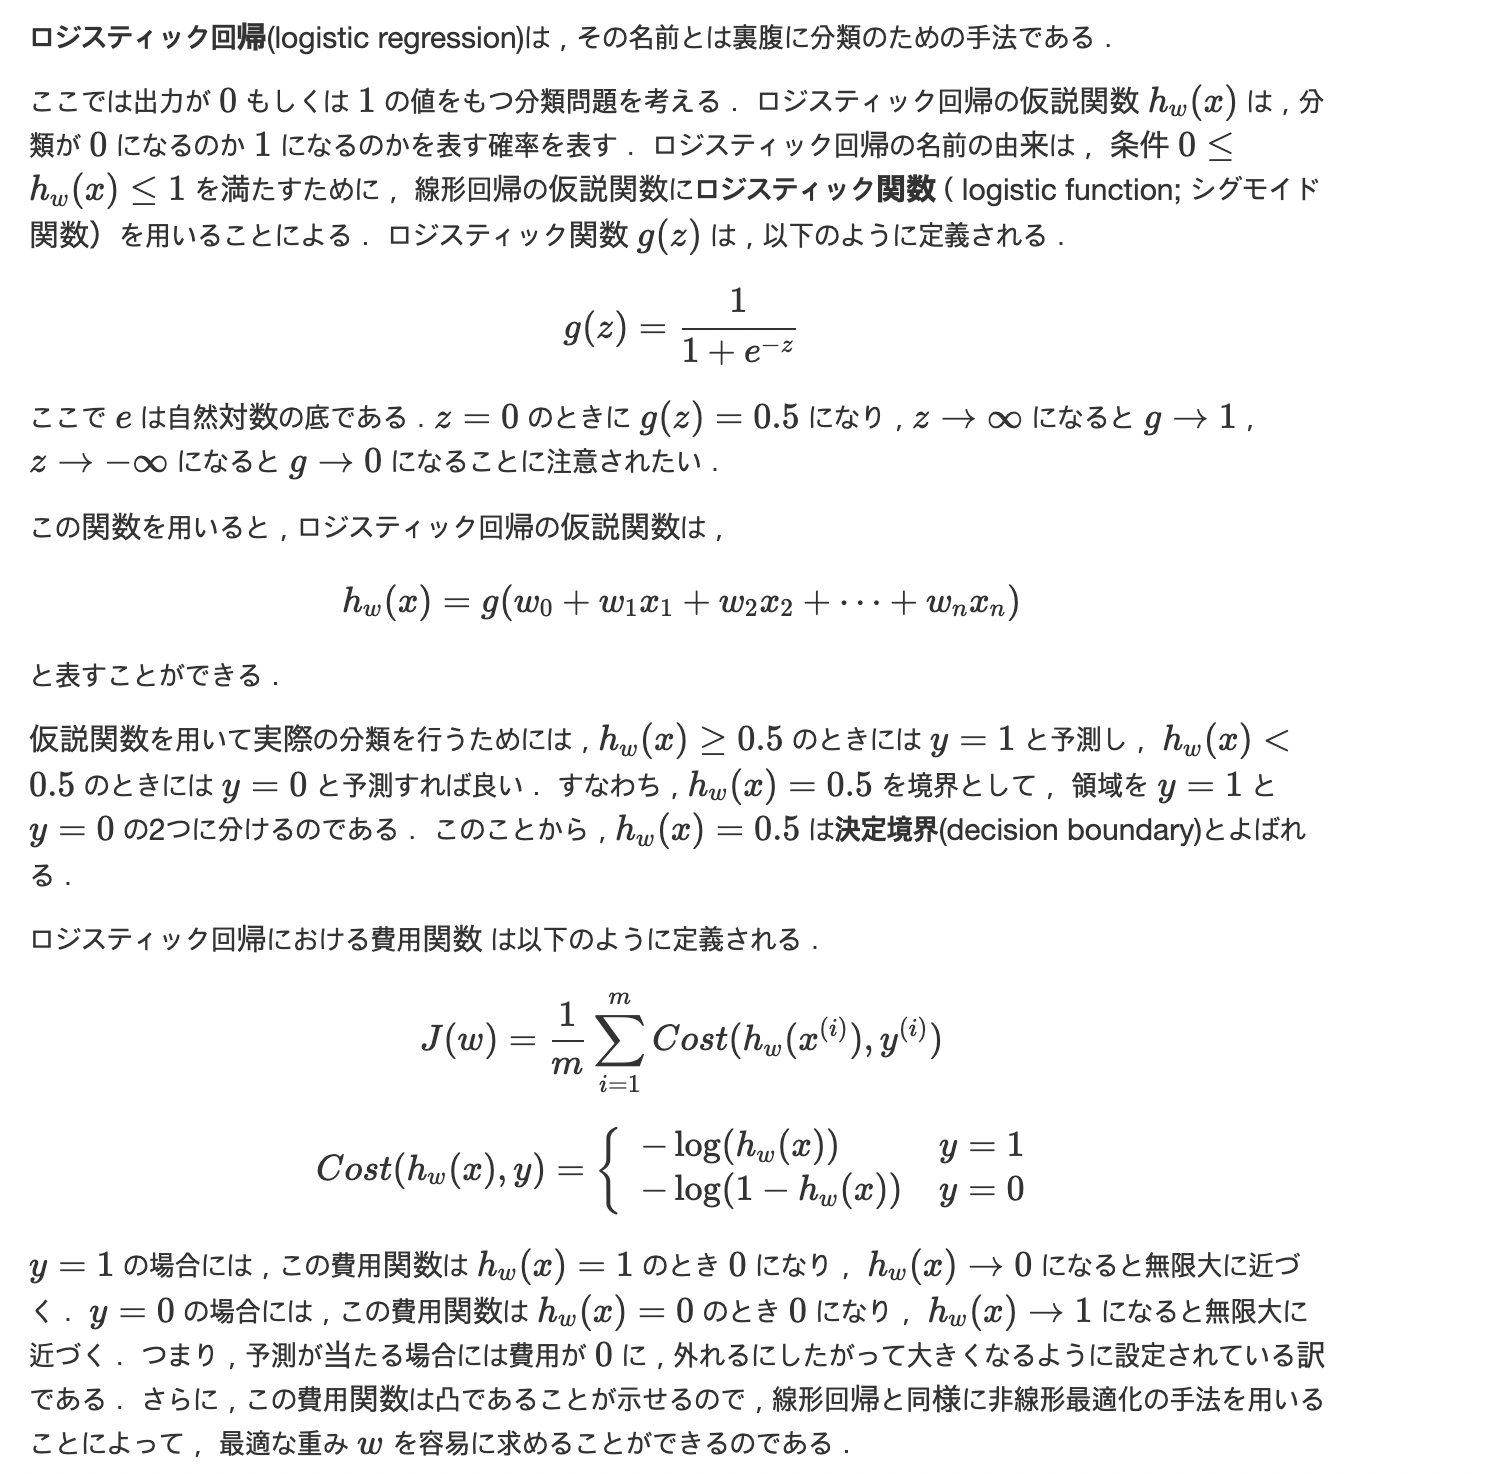

# スパムの判定

In [1]:
# メールがスパム（spam；迷惑メイル）か否かを判定する例題を用いる．

# https://archive.ics.uci.edu/ml/datasets/spambase

# 様々な数値情報から，is_spam列が 1 （スパムでない）か， 0 （スパム）かを判定する．

import pandas as pd
spam = pd.read_csv("http://logopt.com/data/spam.csv")
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [2]:
# is_spam列が従属変数（ターゲット）y になり，それ以外の列が独立変数（特徴ベクトル）X になるロジスティック回帰を用いる。

X = spam.drop("is_spam",axis=1)
y = spam.is_spam
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


# LogisticRegressionクラスの引数

In [3]:
# 最適化の引数をsolver引数で変えることができる． 引数には以下のものが準備されている．

# 1‘newton-cg’: Newton共役方向法
# 2,‘lbfgs’: limited memory BFGS法　（既定値）
# 3,‘liblinear’
# 4,‘sag’
# 5,‘saga’,

from sklearn.linear_model import LogisticRegression #ロジスティック回帰クラスの読み込み
logreg =  LogisticRegression() # インスタンスの生成
logreg.fit(X, y) # 訓練

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [4]:
# 分類に対する可視化

# 下記は評価方法
# 1,混合行列 (ConfusionMatrix)
# 2,分類レポート (ClassificationReport)
# 3,2値分類に対する閾値変化図 (DiscriminationThreshold)
# 4,ROC曲線 (ROCAUC)

# 混合行列(confusion matrix)
# 1,positive : 予測(prediction)が １（スパムでない）；(注意）positiveか否かは相対的なものであるので，どちらでも良い．0（スパム）をpositiveとすることも可能．
# 2,negative : 予測が1（スパム）
# 3,true : あたり
# 4,false : はずれ

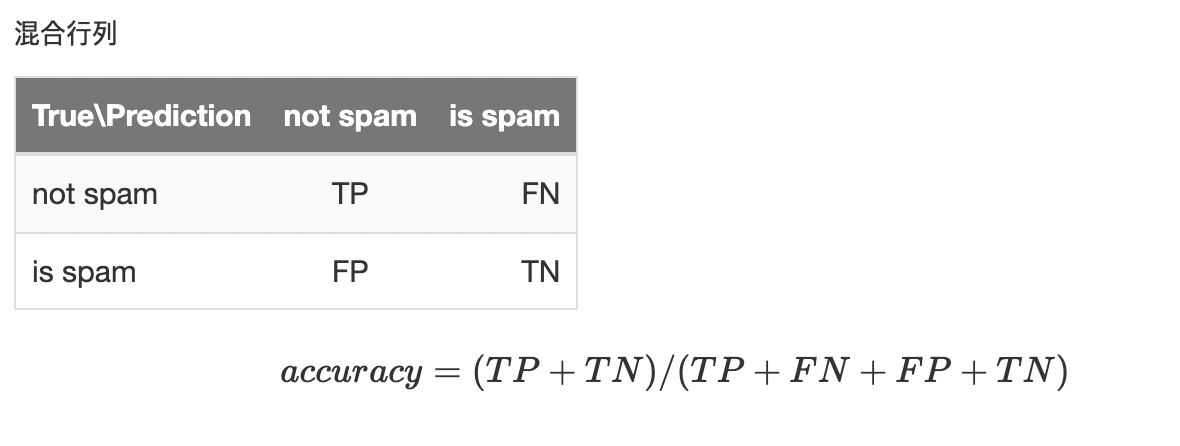

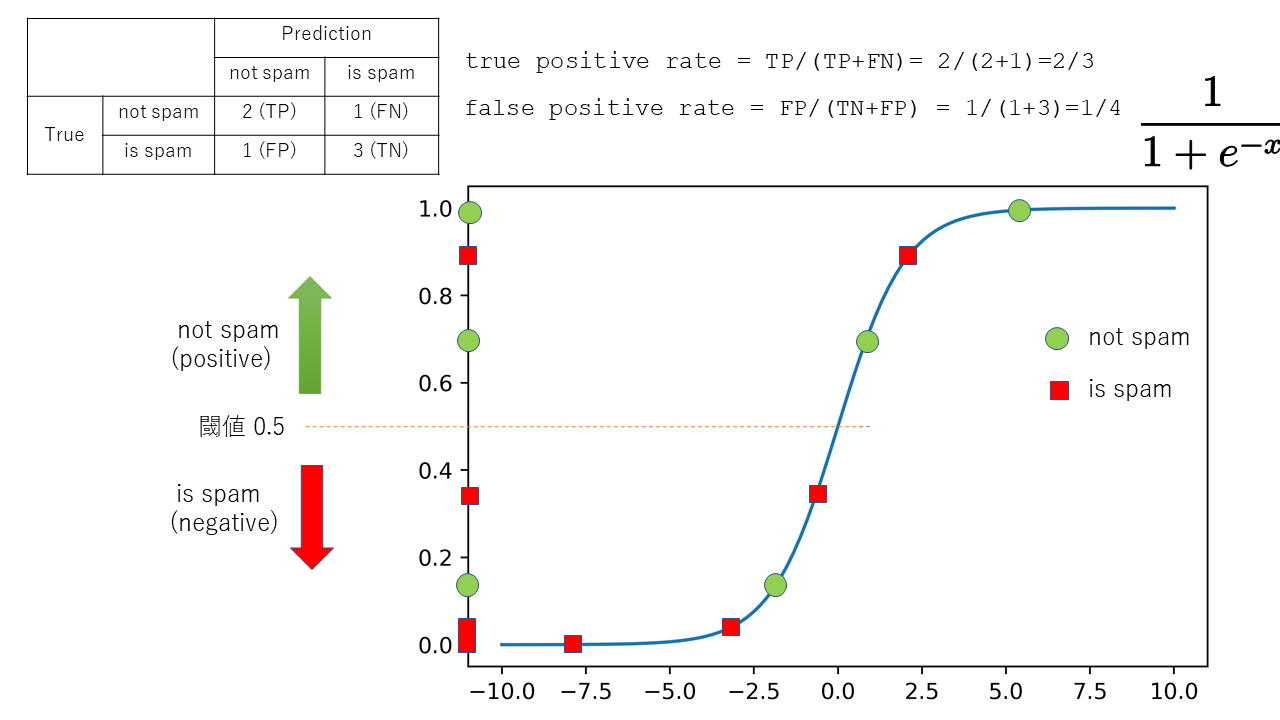

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


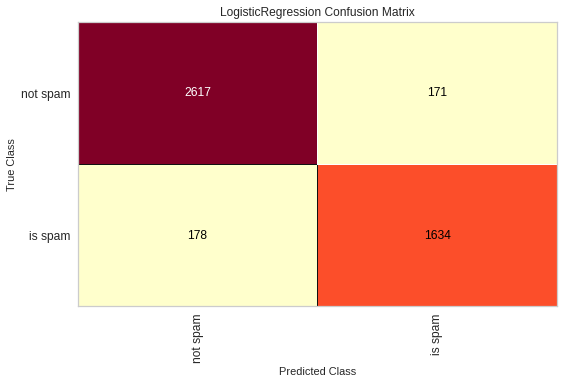

In [5]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(logreg, classes=["not spam", "is spam"]) #classes=["not spam", "is spam"] - クラスは教える必要がある

cm.fit(X, y)
cm.score(X, y)
cm.show();

# メトリクス（評価尺度）

In [6]:
# spamでないメイルをspamと判断するのは（false negative），大事なメイルがスパムフォルダに入ってしまうので困る．
# spamをspamでないと判断するのは（false positive），スパムを消せば良いのであまり困らない．

# 他の尺度が必要

# true positive rate = recall = TP/(TP+FN)
# false positive rate = 1-precision = FP/(TN+FP) - false positive rateは小さい方がいい
# F1 score = 2 * ((precision * recall) / (precision + recall))

TP, FN, FP, TN = 2665, 123, 190, 1622
precision =  TP/(TP+FP)
recall = TP/(FN+TP)
print( "precision=", precision) 
print( "recall=", recall  ) 
print( "F1 score=", 2*(precision*recall)/(precision+recall) )

precision= 0.9334500875656743
recall= 0.9558823529411765
F1 score= 0.9445330497962078


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


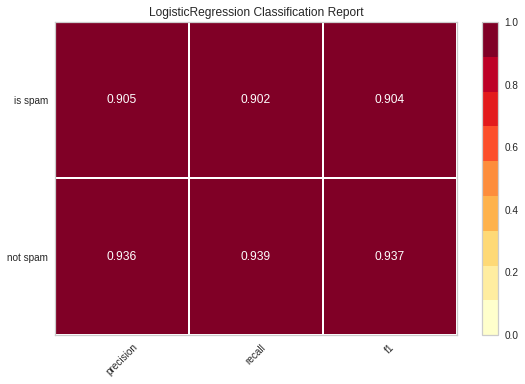

In [7]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(logreg,classes=["not spam","is spam"])

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

#わりかし高い

# 閾値 (threshold)を変えてみる

In [8]:
# ロジスティック回帰は，spamでない確率を推定し，それが閾値より大きいとspamでない，それ以外のときspamと判定する．

# 通常のロジスティック回帰の閾値は0.5
# 閾値を大きくすると，全部spam（negative)と判定（false positiveが減り，precisionが上がる）
# 閾値を小さくすると，全部spamでない(positive)と判定（false negativeが減り，recall が上がる）

# f1 scoreはバランスをとる．

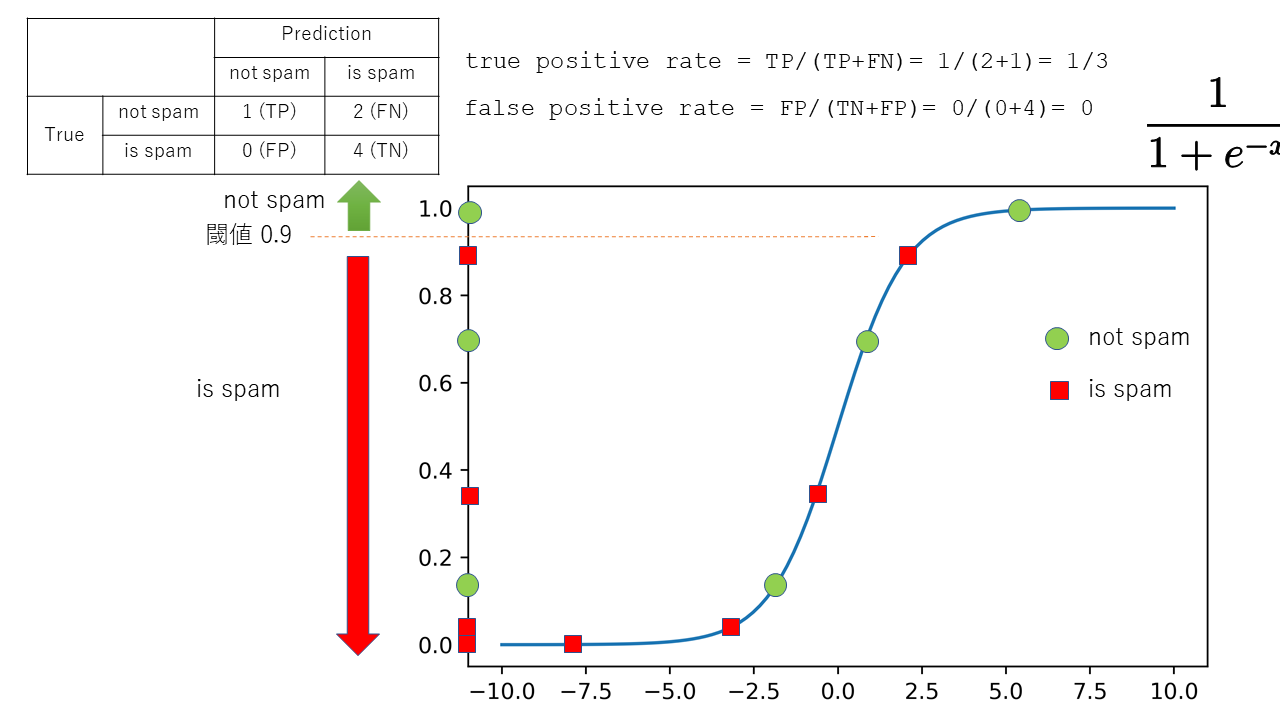

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


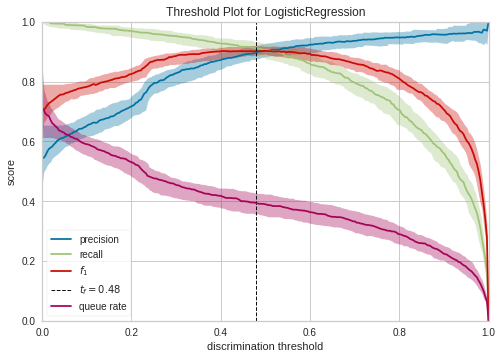

In [9]:
#良い閾値を確認

from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(logreg)

visualizer.fit(X, y)     
visualizer.score(X,y)
visualizer.show();    

# ROC曲線

In [10]:
# ROC: 受信者操作特性（receiver operating characteristic)
# https://ja.wikipedia.org/wiki/受信者操作特性

# 閾値を1から0に変えると，recall (true positive rate) が増加し，precision (1-false positive rate) が減少する．

# x軸に false positive rate，y軸にtrue positive rateをとると，両方とも1に近づく曲線になる．

# 曲線の下の面積 (AUC: area under the curve) が評価尺度（大きいほど良い）になる．

# true positive rate = recall = TP/(TP+FN)
# false positive rate = 1-precision = FP/(TN+FP)

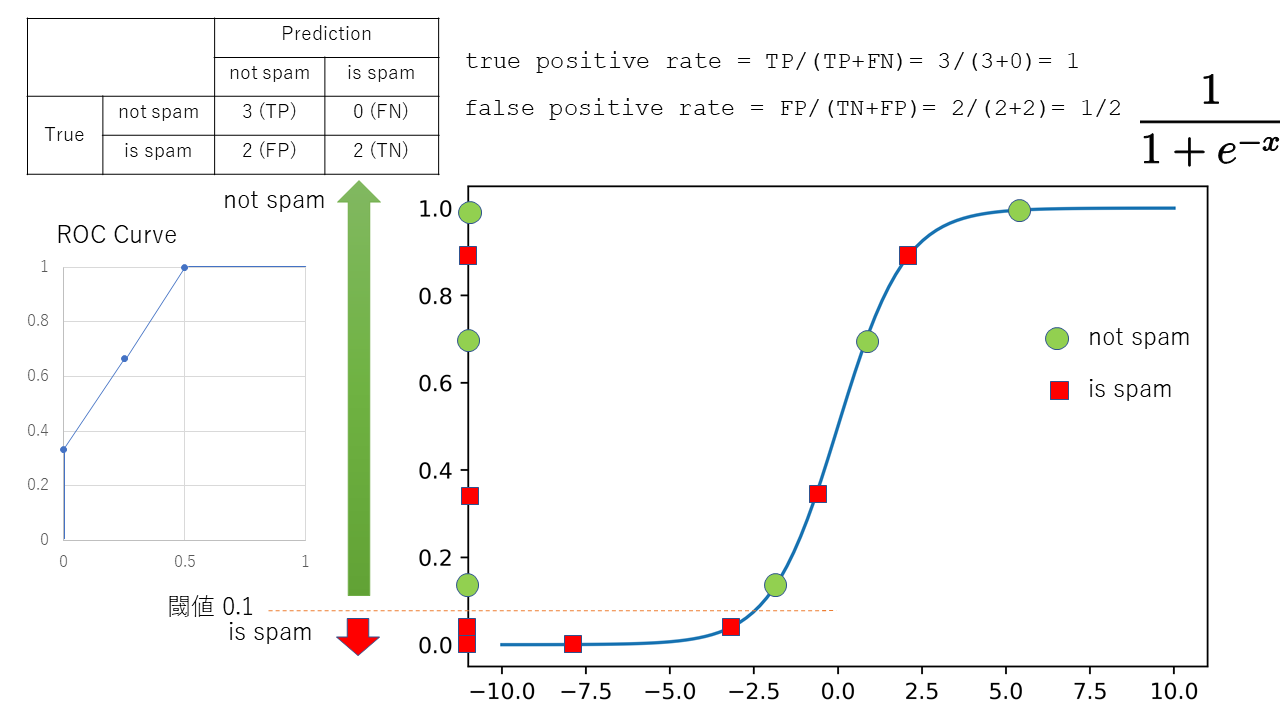

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


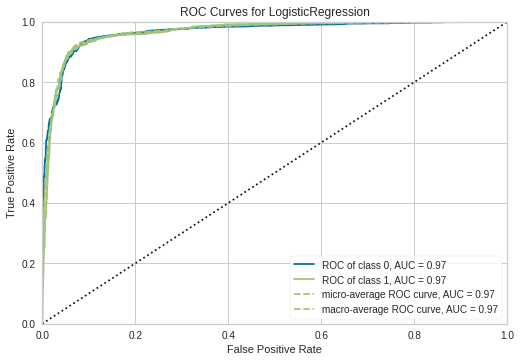

In [11]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(logreg, size=(600,400))

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

#iris（アヤメ）のデータ

In [12]:
# 2値分類だけでなく，3種類以上のものの分類もできる．
# 以下ではアヤメのデータを用いてロジスティック回帰（分類）を行い，3種類のアヤメを分類する．

import plotly.express as px
iris = px.data.iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [13]:
#独立変数(特徴ベクトル) X
X = iris[ ['sepal_length','sepal_width','petal_length','petal_width'] ]

#従属変数 y 
y = iris['species_id']
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: species_id, dtype: int64

In [14]:
# 手順１：分類するためのクラスをインポートして，インスタンスを生成する．
# 手順２：fitメソッドを用いて，訓練する．
# 手順３：predictメソッドを用いて予測を行う．

from sklearn.linear_model import LogisticRegression #ロジスティック回帰クラスの読み込み
logreg =  LogisticRegression() # インスタンスの生成
logreg.fit(X, y) # 訓練

LogisticRegression()

In [15]:
logreg.predict([[3, 5, 4, 2]]) # 試しに予測

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([1])

In [16]:
# 予測と実際の誤差を検証
# 元データXを入れたときの予測y_predと本当の値yの比較
# metricsにある正解率を計算する関数 accuracy_score を利用

y_pred = logreg.predict(X)
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred)) #正解率を計算

0.9733333333333334


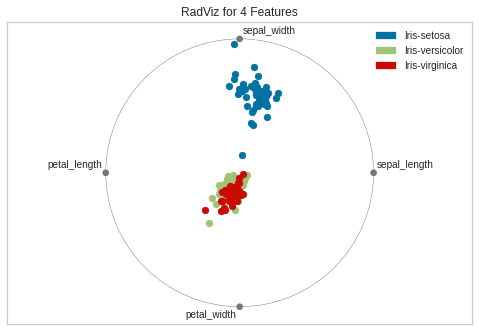

In [17]:
# 可視化
# 以下の2つの可視化を追加
# 1,どの特徴が重要かを可視化するRadViz
# 2,重要と思われる2つの特徴に対して，ロジスティック回帰の分類がどのように行われたかを示すDecisionViz（決定の境界を示す）

# スパムと同じ可視化
# 1,混合行列 (ConfusionMatrix)
# 2,分類レポート (ClassificationReport)
# 3,ROC曲線 (ROCAUC)

# 3値以上の場合には，閾値を変化させる可視化はできないことに注意

from yellowbrick.features import RadViz

visualizer = RadViz(classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                   size=(600,400)) #size = 図の大きさ

visualizer.fit(X, y)           
visualizer.transform(X)       
visualizer.show();

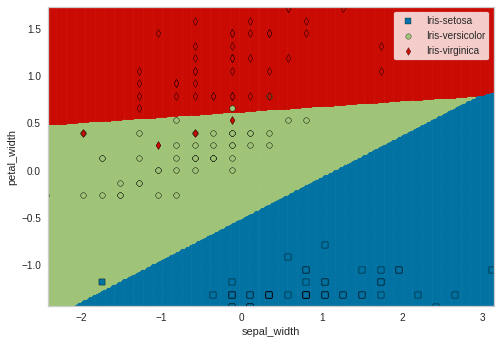

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.contrib.classifier import DecisionViz

X = iris[ ['sepal_width','petal_width'] ] # 2次元を切り出す
X = StandardScaler().fit_transform(X) #可視化のためにスケーリングして正規化する

viz = DecisionViz(
    logreg, 
    features = ['sepal_width','petal_width'],
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
)

viz.fit(X, y)
viz.draw(X, y)
viz.show();

#線で境界を分ける

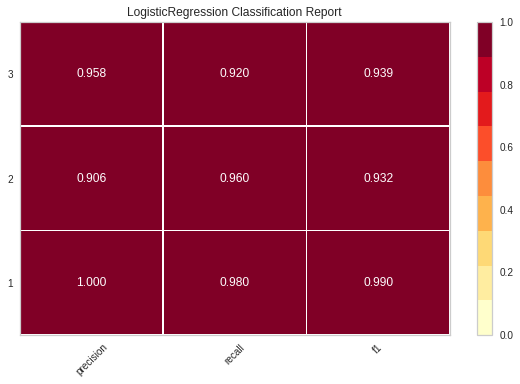

In [19]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(logreg)

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

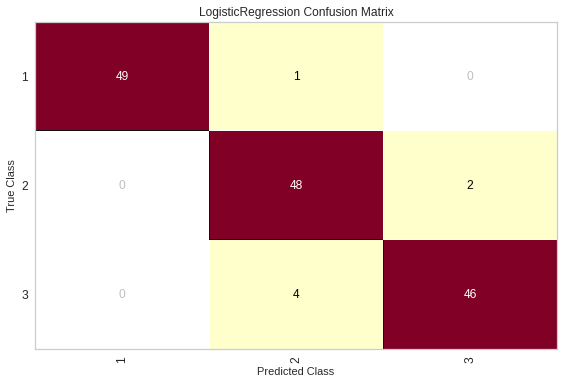

In [20]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(logreg)

cm.fit(X, y)
cm.score(X, y)
cm.show();

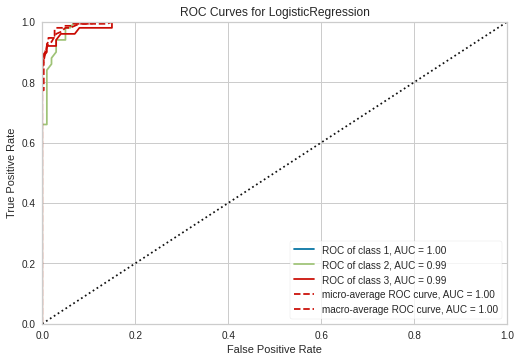

In [21]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(logreg, size=(600,400))

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

#かなりいい精度

#毒キノコの判定

In [22]:
# ここでは，データから毒キノコか否かを判定する.
# target列がターゲット（従属変数）であり，edibleが食用，poisonousが毒である．
# 他の列のデータもすべて数値ではない．ここでは，scikit-learnのprocessingを用いて，数値に変換してからロジスティック回帰により分類を行う．

mashroom = pd.read_csv("http://logopt.com/data/mashroom.csv")
mashroom.head()

,target,shape,surface,color
0,edible,convex,smooth,yellow
1,edible,bell,smooth,white
2,poisonous,convex,scaly,white
3,edible,convex,smooth,gray
4,edible,convex,scaly,yellow


In [23]:
X = mashroom.drop("target",axis=1)
y = mashroom.target

# 前処理(preprocessing)

In [24]:
# sklearn.preprocessingモジュールにあるLabelEncoderクラスのfit_transformメソッドを用いてターゲット列を数値化する．
# edibleは0に，poisonousは1に変換されていることが分かる．

# 独立変数 X に対しては，OrdinalEncoderを用いる．これによって文字列データが数値に変換されていることが分かる．
# なお，OneHotEncoderを使うと，ダイヤモンドの例題でダミー変数に変換したのと同じことができる．

# OneHotEncoder - 順序のついた数値に変換

from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0])

In [25]:
from sklearn.preprocessing import OrdinalEncoder
X = OrdinalEncoder().fit_transform(X)
X

array([[2., 3., 9.],
       [0., 3., 8.],
       [2., 2., 8.],
       ...,
       [3., 3., 0.],
       [4., 2., 0.],
       [2., 3., 0.]])

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='auto',solver="liblinear")
logreg.fit(X,y)

LogisticRegression(solver='liblinear')

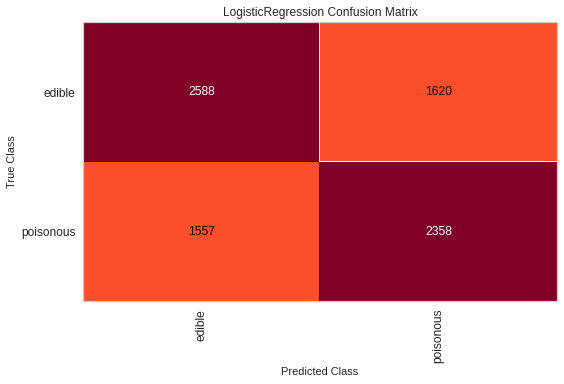

In [27]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(logreg,classes=["edible","poisonous"])

cm.fit(X, y)
cm.score(X, y)
cm.show();

# 今回がハズレが多い

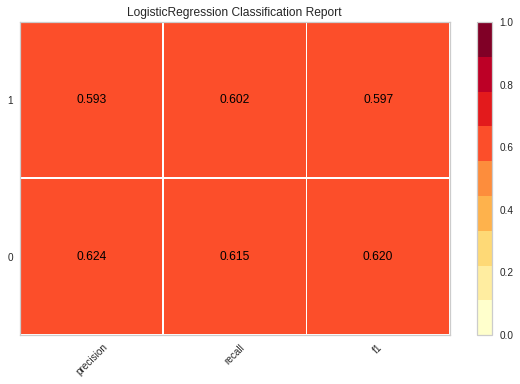

In [28]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(logreg)

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

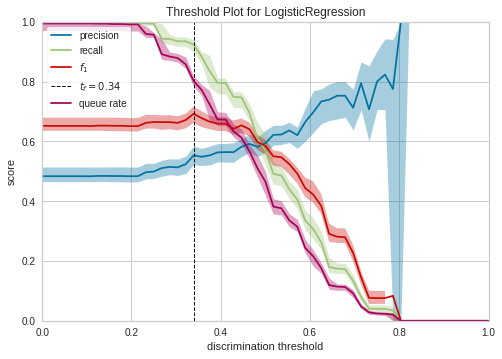

In [29]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(logreg)

visualizer.fit(X, y)     
visualizer.score(X,y)
visualizer.show();   

#当たり具合が悪い

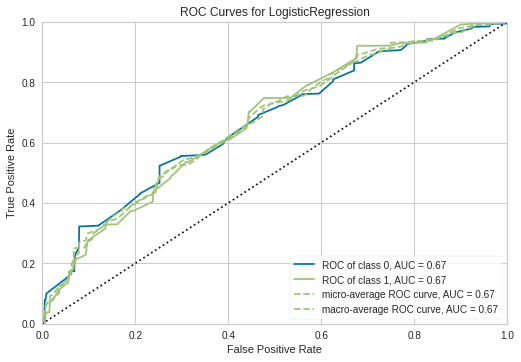

In [30]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(logreg, size=(600,400))

visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show();

#制度が悪い

In [31]:
# 問題（クレジットカード）
# 以下のクレジットカードのデフォルトの判定データに対してロジスティック回帰を行い， 混合行列を描画せよ．
# default列にデフォルトか否かの情報があり，他の列の情報を用いて分類せよ．

credit = pd.read_csv("http://logopt.com/data/credit.csv")
credit.head()

,limit,sex,edu,married,age,apr_delay,may_delay,jun_delay,jul_delay,aug_delay,sep_delay,apr_bill,may_bill,jun_bill,jul_bill,aug_bill,sep_bill,apr_pay,may_pay,jun_pay,jul_pay,aug_pay,sep_pay,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [32]:
# 問題（部屋）
# 以下の部屋が使われているか否かを判定するデータに対してロジスティック回帰を行い，混合行列とROC曲線を描画せよ．
# occupancy列が部屋が使われているか否かを表す情報であり，これをdatetime列以外の情報から分類せよ．

occupancy = pd.read_csv("http://logopt.com/data/occupancy.csv")
occupancy.head()

,datetime,temperature,relative humidity,light,CO2,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [33]:
# 問題（タイタニック）
# titanicデータに対してロジスティック回帰を行い，死亡確率の推定を行え． また，混合行列とROC曲線を描画せよ．

# ヒント：このデータは欠損値を含んでいる．pandasのところで学んだ欠損値処理を参照せよ．
# 非数値の（カテゴリー）データをどのように数値化するかには色々な方法がある．自分で色々工夫せよ．

titanic = pd.read_csv("http://logopt.com/data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# 問題（胸部癌）
# http://logopt.com/data/cancer.csv にある胸部癌か否かを判定するデータセットを用いて分類を行え．
# 最初の列diagnosisが癌か否かを表すものであり，'M'が悪性（malignant），'B'が良性（benign）を表す．

cancer = pd.read_csv("http://logopt.com/data/cancer.csv", index_col=0)
cancer.head().T #横長なので転置して表示する．

id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130,77.58,135.1
area_mean,1001,1326,1203,386.1,1297
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043
symmetry_mean,0.2419,0.1812,0.2069,0.2597,0.1809
